# 15 - Eigendecompositions
- 15.1 Eigenwhatnow?
- 15.2 Finding eigenvalues
- 15.3 Finding eigenvectors
- 15.4 Diagonalization
- 15.5 Conditions for diagonalization
- 15.6 Distinct, repeated eigenvalues
- 15.7 Complex solutions
- 15.8 Symmetric matrices
- 15.9 Eigenvalues of singular matrices
- 15.10 Eigenlayers of a matrix
- 15.11 Matrix powers and inverse
- 15.12 Generalized eigendecomposition
- 15.13 Exercises
- 15.14 Answers
- 15.15 Code challenges
- 15.16 Code solutions

Notes, code snippets, and the end of chapter exercises from the book _Linear Algebra: Theory, Intuition, Code_ by Mike X Cohen. 

Find more information about the book on [github](https://github.com/mikexcohen/LinAlgBook) and [amazon](https://www.amazon.com/Linear-Algebra-Theory-Intuition-Code/dp/9083136604).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as spla

%matplotlib inline

## 15.1 What are eigenvalues and eigenvectors?
Eigendecomposition extracts eigenvalues (scalars) and eigenvectors from a **square** matrix.

The matrix-vector product of a matrix and eigenvector $A v$ is equivalent to the scalar-vector product $\lambda v$

$$
A v = \lambda v
$$

Notes
- The fact that $Av$ scales $v$ is unsual, most other matrix-vector products would rotate and scale the vector $v$.
- A $m \times m$ matrix will have $m$ eigenvalues.

## 15.2 Finding eigenvalues
The roots of the characteristic polynomial correspond to the eigenvalues of the matrix.

$$
\text{det}(A - \lambda I) = 0
$$

Example
$$
\text{det}\left(
\begin{bmatrix}
2 & 5 \\
6 & 3 \\
\end{bmatrix} - \lambda I\right) = 0 \\
\text{det}\left(
\begin{bmatrix}
2 - \lambda & 5 \\
6 & 3 - \lambda \\
\end{bmatrix} \right) = 0 \\
(2 - \lambda)(3 - \lambda) - 30 = 0 \\
\lambda^2 - 5 \lambda - 24 = 0 \\
(\lambda - 8) (\lambda + 3) = 0 \\
\lambda = +8, -3
$$

### Why This Works
The eigenvector is the vector in the nullspace of a matrix shifted by its eigenvalue.

$$
A v = \lambda v \\
A v - \lambda I v = 0 \\
(A - \lambda I) v = 0 \\
$$

Notes
- Shifted matrix $(A - \lambda I)$ must be singular in order for the nullspace to be non-empty.

### Properties of Eigenvalues
The trace of a matrix is equal to the sum of the eigenvalues.

$$
\text{tr}(A) = \sum_i^k \lambda_i
$$

The determinant of a matrix is equal to the product of the eigenvalues.

$$
\text{det}(A) = \prod_i^k \lambda_i
$$

Notes
- Any singular matrix $\text{det}(A) = 0$ must have at least one zero-valued eigenvalue.

In [2]:
A = np.random.random((4,4))

L, _ = np.linalg.eig(A)

# Verify that the sum of the eigenvalues equals the trace of the matrix.
np.testing.assert_almost_equal(np.sum(L), np.trace(A))

# Verify that the product of the eigenvalues equals the determinant of the matrix.
np.testing.assert_almost_equal(np.prod(L), np.linalg.det(A))

## 15.3 Finding eigenvectors
1. Find eigenvalues using the roots of the characteristic equation.

$$
\text{det}(A - \lambda I) = 0
$$

2. Each eigenvector $v_i$ associated with an eigenvalue $\lambda_i$ will be the vector in the null space of the matrix shifted by the eigenvalue. 

$$
(A - \lambda_i I) v_i = 0
$$

Example

Step 1. Find eigenvalues.
$$
\text{det}\left(
\begin{bmatrix}
1 & 2 \\
2 & 1 \\
\end{bmatrix} - \lambda I\right) = 0 \\
\text{det}\left(
\begin{bmatrix}
1 - \lambda & 2 \\
2 & 1 - \lambda \\
\end{bmatrix} \right) = 0 \\
\lambda^2 - 2 \lambda - 3 = 0 \\
(\lambda - 3) (\lambda + 1) = 0 \\
\lambda_1 = +3, \lambda_2 = -1
$$

Step 2. Find eigevectors.
$$
(A - \lambda_1 I) v_1 = 0 \\
\begin{bmatrix}
1 - 3 & 2 \\
2 & 1 - 3 \\
\end{bmatrix} v_1 = 0 \\
\begin{bmatrix}
-2 & 2 \\
2 & -2 \\
\end{bmatrix}
\begin{bmatrix}
1 \\
1 \\
\end{bmatrix} = 0 \\
v_1 = \begin{bmatrix}1 & 1\end{bmatrix}^T \\
$$

$$
(A - \lambda_2 I) v_2 = 0 \\
\begin{bmatrix}
1 + 1 & 2 \\
2 & 1 + 1 \\
\end{bmatrix} v_2 = 0 \\
\begin{bmatrix}
2 & 2 \\
2 & 2 \\
\end{bmatrix}
\begin{bmatrix}
1 \\
-1 \\
\end{bmatrix} = 0 \\
v_2 = \begin{bmatrix}1 & -1\end{bmatrix}^T \\
$$

In [3]:
A = np.array([[1,2],[2,1]], dtype=float)
L, V = np.linalg.eig(A)

# Verify the eigenvalues match example from above.
np.testing.assert_almost_equal(L, np.array([3,-1]))

# Verify the eigenvectors match example (ignore sign differences).
# NOTE(mmorais): numpy returns eigenvectors normalized to unit length.
v1 = np.array([1,1], dtype=float)
v1 /= np.linalg.norm(v1)
v2 = np.array([1,-1], dtype=float)
v2 /= np.linalg.norm(v2)
Vprime = np.stack((v1,v2), axis=1)
np.testing.assert_almost_equal(np.abs(V), np.abs(Vprime))

## 15.4 Diagonalization
Eigendecompositions find a set of basis vectors for a matrix such that the matrix is diagonal to that basis.

The set of eigenvectors is arranged in the column matrix $V$ and left multiplied by the eigenvalues in the diagonal matrix $\Lambda$ (_capital $\lambda$_).

$$
A V = V \Lambda
$$

### Factorization of $A$ Using Eigendecomposition
The matrix $A$ can be factorized into the product of eigenvectors and eigenvalues.

$$
A = V \Lambda V^{-1}
$$

Notes
- $V^{-1}$ exists since the eigenvectors form a basis and are therefore linearly independent.
- Helpful to think of the eigendecomposition as revealing the structure of the matrix $A$.

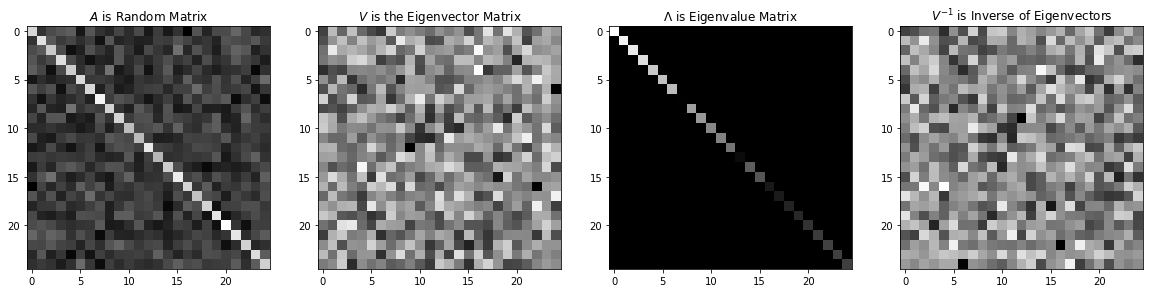

In [4]:
def rand_matrix_real_eigenvalues(n):
    """
    rand_matrix_real_eigenvalues returns a matrix of random values with real eigenvalues

    :param n: int            Size of a single dimension of the returned matrix.
    :return: numpy.ndarray   Symmetric matrix A = A^T
    """
    # Eigenvalues of a diagonal matrix are the elements on diagonal.
    # Generate n real-valued eigenvalues.
    D = np.diag(np.random.random(n))
    # Generate a random orthogonal matrix.
    Q, _ = np.linalg.qr(np.random.random((n,n)))
    # Compute the matrix similarity transform from D to B.
    B = Q @ D @ Q.T
    return B


n = 25
A = rand_matrix_real_eigenvalues(n)

L, V = np.linalg.eig(A)
L = np.diag(L)
Vinv = np.linalg.inv(V)

# Verify the factorization of A = V Lambda V^-1.
np.testing.assert_almost_equal(V @ L @ Vinv, A)

# Plot the original matrix and components of factorization.
fig1, axes = plt.subplots(1, 4, figsize=(20,6))
axes[0].imshow(A, cmap='gray')
axes[0].set_title('$A$ is Random Matrix')
axes[1].imshow(V, cmap='gray')
axes[1].set_title('$V$ is the Eigenvector Matrix')
axes[2].imshow(L, cmap='gray')
axes[2].set_title('$\\Lambda$ is Eigenvalue Matrix')
axes[3].imshow(Vinv, cmap='gray')
axes[3].set_title('$V^{-1}$ is Inverse of Eigenvectors')
plt.show()

## 15.5 Conditions for diagonalization
Not all square matrices are diagonalizable.

Symmetric matrices $A = A^T$ are diagonalizable.

The eigenvalues of a diagonal matrix are the elements along the diagonal and the eigenvectors are the identity matrix. Proof: $A = I D I = V \Lambda V^{-1}$.

$$
\text{diag}(A) = \lambda_1, \lambda_2, \cdots, \lambda_k
$$

In [5]:
n = 10
A = np.diag(np.random.random(n))

L, V = np.linalg.eig(A)

# Verify that the eigenvalules are equal to the elements along the diagonal.
np.testing.assert_almost_equal(L, np.diag(A))

# Verify that the eigenvectors are equal to the identity matrix.
np.testing.assert_almost_equal(V, np.eye(n))

## 15.6 Distinct, repeated eigenvalues
Distinct eigenvalues $\lambda_1 \neq \lambda_2 \neq \dots \neq \lambda_k$ produce linearly independent eigenvectors.

Notes
- When eigenvectors $V = \begin{bmatrix}v_1 & \cdots & v_k\end{bmatrix}$ are linearly independent, then $V^{-1}$ exists.

## 15.7 Complex solutions
Complex eigenvalues result in complex eigenvectors.

Real-valued matrices can produce complex eigenvalues.

When eigenvalues and eigenvectors are complex, they always appear in pairs that are conjugates of each other (_imaginary part has sign flip_).

In [6]:
# Demonstrate a real-valued matrix with complex eigenvalues and eigenvectors.
A = np.array([[0,-1],[1,0]], dtype=float)
L, V = np.linalg.eig(A)

print("L\n", L)
print("V\n", V)

# Verify the eigenvalues are conjugate pairs.
np.testing.assert_almost_equal(L[0].conjugate(), L[1])

# Verify the eigenvectors are conjugate pairs.
np.testing.assert_almost_equal(V[:,0].conjugate(), V[:,1])

L
 [0.+1.j 0.-1.j]
V
 [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


## 15.8 Symmetric matrices
Symmetric matrices $A = A^T$ are special.
- If $A$ is symmetric, then eigenvectors of $A$ are orthogonal.
    - When eigenvectors are orthogonal, then $V^T V$ is a diagonal matrix. 
    - When eigenvectors are orthonormal (_unit length_), then $V^T V = I$.
- If $A$ is symmetric, then eigenvalues are real-valued.
- If $A$ is symmetric, then $A$ is diagonalizable and $A = V \Lambda V^{-1}$ exists.



In [7]:
n = 4
A = np.random.random((n,n))
Asym = A.T @ A  # Create symmetric matrix, see 6.6.

# Numpy returns normalized eigenvectors, hence V is orthonormal.
L, V = np.linalg.eig(Asym)

# Verify that V^T V = I.
np.testing.assert_almost_equal(V.T @ V, np.eye(n))

## 15.9 Eigenvalues of singular matrices
Any singular matrix $\text{det}(A) = 0$ must have at least one zero-valued eigenvalue.
- Proof: $\text{det}(A) = 0 = \prod_i^k \lambda_i$

## 15.10 Eigenlayers of a matrix
Layer perspective is closely related to spectral theory of matrices which says that any matrix can be represented as sum of rank-1 matrices.

### Recap: Layer Perspective (_6.1_)
Interpretation of matrix multiplication as sum of outer product of columns of A and rows of B.

$$
\begin{bmatrix}
a_{1,1} & a_{1,2} \\
a_{2,1} & a_{2,2} \\
\end{bmatrix}
\begin{bmatrix}
b_{1,1} & b_{1,2} \\
b_{2,1} & b_{2,2} \\
\end{bmatrix}
=
\begin{bmatrix}
a_{1,1} \\
a_{2,1} \\
\end{bmatrix}
\begin{bmatrix}
b_{1,1} & b_{1,2} \\
\end{bmatrix}
+
\begin{bmatrix}
a_{1,2} \\
a_{2,2} \\
\end{bmatrix}
\begin{bmatrix}
b_{2,1} & b_{2,2} \\
\end{bmatrix}
$$

### Spectral Theory: Special Case > Symmetric Matrices
An $M \times M$ matrix $A$ can be reconstructed as the outer product of the eigenvectors scaled by each eigenvalue.

$$
A = \sum_{i=1}^M v_i \lambda_i v_i^T
$$

Notes
- Recall that symmetric matrices have orthogonal eigenvectors $V^T = V^{-1}$.

### Spectral Theory: General Matrices
An $M \times M$ matrix $A$ can be reconstructed as the outer product of an eigenvector and a column from its' inverse scaled by each eigenvalue.

$$
A = \sum_{i=1}^M v_i \lambda_i v_i^{-T}
$$

Notes
- $v_i^{-T}$ is the corresponding column from the inverse of the eigenvector matrix $V^{-1}$.

#### Example
Reconstruct $A$ from $V$ and $\Lambda$.

$$
V = 
\begin{bmatrix}
1 & 2 \\
0 & 1 \\
\end{bmatrix}
\quad
\Lambda =
\begin{bmatrix}
2 & 0 \\
0 & 3 \\
\end{bmatrix}
$$

Matrix is not symmetric. Use spectral theory for general matrix. 

Step 1. Use Cramer's Rule to compute $V^{-1}$ and $V^{-T}$.

$$
V^{-1} = 
\begin{bmatrix}
1 & -2 \\
0 & 1 \\
\end{bmatrix}
\quad
V^{-T} = 
\begin{bmatrix}
1 & 0 \\
-2 & 1 \\
\end{bmatrix} 
$$

Step 2. Reconstruct $A$ from the sum of the outer products.

$$
v_1 \lambda_1 v_1^{-T} =
\begin{bmatrix}
1 \\
0 \\
\end{bmatrix}
2
\begin{bmatrix}
1 & -2 \\
\end{bmatrix}
=
\begin{bmatrix}
2 & -4 \\
0 & 0 \\
\end{bmatrix} \\
v_2 \lambda_2 v_2^{-T} =
\begin{bmatrix}
2 \\
1 \\
\end{bmatrix}
3
\begin{bmatrix}
0 & 1 \\
\end{bmatrix}
=
\begin{bmatrix}
0 & 6 \\
0 & 3 \\
\end{bmatrix} \\
A = v_1 \lambda_1 v_1^{-T} + v_2 \lambda_2 v_2^{-T} =
\begin{bmatrix}
2 & 2 \\
0 & 3 \\
\end{bmatrix} \\
$$

### Why Is Spectral Theory Useful?
A low rank approximation $r$ of the matrix with $k$ eigenvalues is formed using $r < k$ outer products.
- Applications in the areas of data compression or signal processing.

In [8]:
def reconstruct(L, V):
    """
    reconstruct A from eigenvalues and eigenvectors using Spectral Theory

    :param L: numpy.ndarray  Matrix L of eigenvalues
    :param V: numpy.ndarray  Matrix V of eigenvectors
    :return: numpy.ndarray   Matrix A
    """
    A = np.zeros_like(V)
    Vinv = np.linalg.inv(V)
    for i in range(A.shape[0]):
        A += L[i] * np.outer(V[:,i], Vinv.T[:,i])
    return A


n = 10
A = np.random.random((n,n))

L, V = np.linalg.eig(A)

# Reconstruct A from the outer products.
Aprime = reconstruct(L, V)

# Verify that A is reconstructed from L and V.
np.testing.assert_almost_equal(Aprime, A)

## 15.11 Matrix powers and inverse

### Matrix Powers
Diagonalization of a matrix leads to very efficient form for computing the power of a matrix.

$$
A^n = V \Lambda^n V^{-1}
$$

Notes
- Multiplication of two diagonal matrices is the product of the diagonals (_6.3_).
- $\Lambda^n$ is the matrix of eigenvalues with each eigenvalue raised to the power $n$.

### Matrix Inverse
Diagonalization of a matrix leads to a numerically stable form for finding the inverse of a matrix.

$$
A^{-1} = V \Lambda^{-1} V^{-1}
$$

Source of improved numerical stability is that eigenvectors $V$ are normalized.

Notes
- Inverse of a diagonal matrix is the reciprocal of the diagonal elements (_12.2_).
- $\Lambda^{-1}$ is the reciprocal of the eigenvalues located along the diagonals.
- If $A$ is symmetric, then $V$ is orthogonal and $V^{-1} = V^T$.
- As usual, $A^{-1}$ exists only when $A$ is non-singular.

In [9]:
def inverse_diagonalization(A):
    """
    inverse A from eigenvalues and eigenvectors using diagonalization

    :param A: numpy.ndarray  Matrix A
    :return: numpy.ndarray   Matrix Ainv
    """
    assert A.shape[0] == A.shape[1], "A is not square"

    # Use eigendecomposition to find eigenvalues and eigenvectors of A.
    L, V = np.linalg.eig(A)

    # Inverse of diagonal matrix is reciprocal of diagonal elements. 
    assert np.all(L), "A contains a zero-valued eigenvalue"
    Linv = 1./L

    # Use inverse of diagonalization to find A^{-1}.
    Vinv = np.linalg.inv(V)
    Ainv = V @ np.diag(Linv) @ Vinv

    return Ainv


n = 10
A = np.random.random((n,n))

Ainv = inverse_diagonalization(A)

# Verify that A A^{-1} = I.
np.testing.assert_almost_equal(A @ Ainv, np.eye(n))

# Compare inverse computed via diagonalization to np.linalg.inv.
np.testing.assert_almost_equal(Ainv, np.linalg.inv(A))

## 15.12 Generalized eigendecomposition
Generalized eigenvalue problem finds the vector $v$ that satisfies the eigenvalue equation for two matrices $A$ and $B$.

$$
A v = \lambda B v
$$

If $B$ is invertible, then the generalized eigenvalue can be rewritten as eigenvalue equation for matrix product $B^{-1} A$.

$$
B^{-1} A v = \lambda v
$$

Generalized eigenvalue problem extends to simultaneous diagonalization of two matrices $A$ and $B$.

$$
A V = B V \Lambda
$$

Notes
- Think of $B^{-1} A$ as matrix version of ratio of $A$ to $B$ e.g. equivalent to division.
- Recall from (_15.5_) that not all matrix products $B^{-1} A$ are diagonalizable. 
- Generalized eigenvalue problem has applications for linear discriminant analysis (LDA) and classification.

## 15.15 Code challenges

> Explore the relationship between the generalized eigenvalue equation for two matrices. Create two matrices A and B. Perform (1) generalized eigendecomposition of both matrices, and (2) regular eigendecomposition of $B^{-1} A$. Check whether the eigenvalues are the same. Repeat for $2 \times 2$, $10 \times 10$ and $50 \times 50$ matrices. Do you need to compare the eigenvectors or is it sufficient to compare the eigenvalues?

Notes
- `numpy.linalg.eig` doesn't support generalized eigendecomposition, use `scipy.linalg.eig` for this.
- Work around the explicit support in numpy by solving eigendecomposition of $B^{-1} A$.
- Since the methods used to perform generalized eigendecomposition are different, the eigenvalues will slightly differ.
- Sufficient to compare eigenvalues. If eigenvalues differ, then eigenvectors will certainly differ.
- Unlike SVD, eigendecomposition doesn't guarantee that eigenvalues are returned in any particular order. Need to sort before comparing.

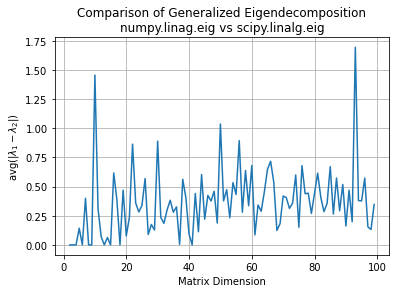

In [10]:
dims = np.arange(2, 100)
avgabsdelta = np.zeros(len(dims))

for i, n in enumerate(dims):
    A = np.random.random((n,n))
    B = np.random.random((n,n))

    # Use scipy.linalg.eig to solve generalized eigendecomposition.
    L1, _ = spla.eig(A, B)
    L1 = L1[np.argsort(L1)]

    # Work around for numpy: Solve eigendecomposition of B^-1 A.
    BinvA = np.linalg.inv(B) @ A
    L2, _ = np.linalg.eig(BinvA)
    L2 = L2[np.argsort(L2)]

    # Compute average absolute difference in eigenvalues for each method.
    avgabsdelta[i] = np.mean(np.abs(L1-L2))


plt.plot(dims, avgabsdelta)
plt.title('Comparison of Generalized Eigendecomposition\nnumpy.linag.eig vs scipy.linalg.eig')
plt.ylabel('avg($| \lambda_1 - \lambda_2 |$)')
plt.xlabel('Matrix Dimension')
plt.grid()
plt.show()

> You learned that diagonalization means to transform a matrix into a diagonal matrix with the eigenvectors providing the transformation. What happens if the matrix A is already a diagonal matrix? What are the eigenvalues and eigenvectors?

The eigenvalues of a diagonal matrix are the elements along the diagonal and the eigenvectors are the identity matrix.

See section 15.5.

> Recall from (_5.6_) that Hankel matrices have aesthically pleasing eigendecompositions. Create a $50 \times 50$ Hankel matrix and take its eigendecomposition. Sort the eigenvectors by descending eigenvalues. Plot the Hankel matrix and its eigenvectors matrix.

Notes
- Hankel matrices constructed from two vectors have equal values along skew-diagonals.
- Plot of the Hankel matrix eigenvectors are sine waves.

In [11]:
def hankel(x, r):
    """
    hankel returns the Hankel matrix constructed from two vectors
    
    :param x: numpy.ndarray  Vector.
    :param r: numpy.ndarray  Vector
    :return: numpy.ndarray   Hankel matrix.
    """
    assert x.ndim == r.ndim == 1

    n = x.shape[0]
    A = np.zeros((n,n), dtype=x.dtype)
    for i in range(n):
        # Reflected upper triangular matrix.
        for j, jj in zip(range(0,n-i), range(i,n)):
            A[i,j] = x[jj]
        # Reflected lower triangular matrix.
        for j, jj in zip(range(n-i,n), range(1,i+1)):
            A[i,j] = r[jj]
    return A


# Create a Hankel matrix from a pair of vectors.
n = 5
x = np.array([1,2,3,5])
r = np.array([5,7,8,9])
H = hankel(x, r)

# Create Hankel matrix from x using scipy.
Hprime = spla.hankel(x, r)

# Verify Hankel matrix created matches built-in function from scipy.
np.testing.assert_almost_equal(H, Hprime)

# Print Hankel matrix, notice that skew-diagonals are equal.
print(H)

[[1 2 3 5]
 [2 3 5 7]
 [3 5 7 8]
 [5 7 8 9]]


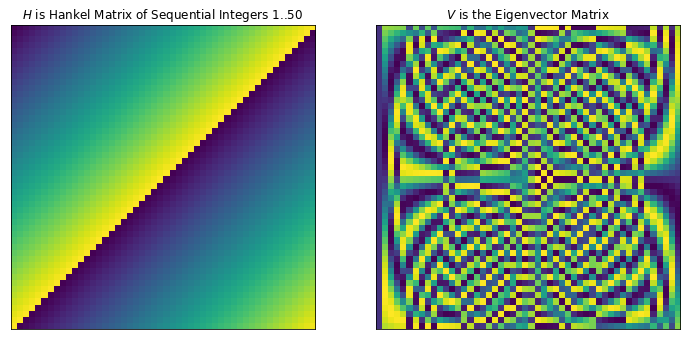

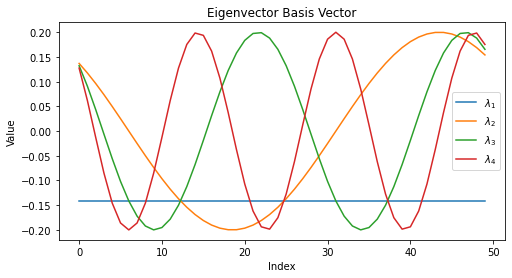

In [12]:
# Create Hankel matrix from sequential integers 1..50.
n = 50
x = np.arange(1, n+1)
r = np.append(x[-1], np.arange(1,x[-1]))
H = hankel(x, r)

# Perform eigendecomposition.
L, V = np.linalg.eig(H)

# Sort eigenvectors and eigenvalues in descending order.
inds = np.flip(np.argsort(L)) 
L, V = L[inds], V[:,inds]

# Plot the original matrix and the eigenvectors as an image.
fig1, axes = plt.subplots(1, 2, figsize=(12,6),
                          subplot_kw={'xticks':[], 'yticks': []})
axes[0].imshow(H, cmap='viridis')
axes[0].set_title('$H$ is Hankel Matrix of Sequential Integers 1..50')
axes[1].imshow(V, cmap='viridis')
axes[1].set_title('$V$ is the Eigenvector Matrix')
plt.show()

# Plot each eigenvector as a function of index.
plt.figure(figsize=(8,4))
for ind in range(4):
    plt.plot(V[:,ind], label=f'$\lambda_{ind+1}$')
plt.title('Eigenvector Basis Vector')
plt.ylabel('Value')
plt.xlabel('Index')
plt.legend()
plt.show()